# Parameter Screen

This notebooks how a parameter screen can be done on AlphaPept to find optimal values.

In [1]:
from alphapept.paths import SETTINGS_TEMPLATE_PATH, DEFAULT_SETTINGS_PATH
import numpy as np
import alphapept.interface
from alphapept.settings import load_settings_as_template 

SETTINGS_TEMPLATE = load_settings_as_template(SETTINGS_TEMPLATE_PATH)

In [2]:
results = []
n_sample = 5

group = 'features'

print(SETTINGS_TEMPLATE[group].keys())

for param in ['centroid_tol']: #Test 1 parameter for now
    for selector in np.linspace(SETTINGS_TEMPLATE[group][param]['min'], SETTINGS_TEMPLATE[group][param]['max'], n_sample):
        print(group, param, selector)
        
        if SETTINGS_TEMPLATE[group][param]['type'] == 'spinbox':
            selector = int(selector)
            
        settings = load_settings_as_template(DEFAULT_SETTINGS_PATH)

        settings['experiment']['file_paths'] =  ['F:/temp_test_run/thermo_IRT.raw']
        settings['fasta']['fasta_paths'] = ['F:/temp_test_run/human.fasta', 'F:/temp_test_run/arabidopsis.fasta', 'F:/temp_test_run/contaminants.fasta']

        settings[group][param] = selector

        try:
            settings_ = alphapept.interface.run_complete_workflow(settings)
            try:
                n_features = settings_['summary']['thermo_IRT']['feature_table (n in table)']
            except KeyError as e:
                raise
                n_proteins = 0
            time = settings_['summary']['timing']['total (min)']
            results.append((group, param, selector, n_features, time))

        except Exception as e:
            print(e)
            raise

dict_keys(['max_gap', 'centroid_tol', 'hill_length_min', 'hill_split_level', 'iso_split_level', 'hill_smoothing', 'hill_check_large', 'iso_charge_min', 'iso_charge_max', 'iso_n_seeds', 'hill_nboot_max', 'hill_nboot', 'iso_mass_range', 'iso_corr_min', 'map_mz_range', 'map_rt_range', 'map_mob_range', 'map_n_neighbors', 'search_unidentified'])
features centroid_tol 1.0
2022-10-25 11:08:09> Logging to C:\Users\admin\alphapept\logs\log_20221025110809.txt.
2022-10-25 11:08:09> Code location f:\projects\alphapept\alphapept
2022-10-25 11:08:09> Python location C:\Users\admin\.conda\envs\alphapept_stable\python.exe
2022-10-25 11:08:09> Platform information:
2022-10-25 11:08:09> system     - Windows
2022-10-25 11:08:09> release    - 10
2022-10-25 11:08:09> version    - 10.0.19044
2022-10-25 11:08:09> machine    - AMD64
2022-10-25 11:08:09> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-10-25 11:08:09> cpu count  - 24
2022-10-25 11:08:09> ram memory - 119.0/127.7 Gb (availab

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:08:09> Processing 1 files for step raw_conversion
2022-10-25 11:08:09> File F:/temp_test_run/thermo_IRT has extension .raw - converting from Thermo.
2022-10-25 11:08:14> File conversion complete. Extracted 2,603 precursors.
2022-10-25 11:08:15> File conversion of file F:/temp_test_run/thermo_IRT.raw complete.


  0%|                                                                                            | 0/1 [00:05<?, ?it/s]

2022-10-25 11:08:15> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:08:19> Processing 1 files for step find_features
2022-10-25 11:08:19> No *.hdf file with features found for F:/temp_test_run/thermo_IRT.ms_data.hdf. Adding to feature finding list.
2022-10-25 11:08:19> Feature finding on F:/temp_test_run/thermo_IRT.raw
2022-10-25 11:08:19> Hill extraction with centroid_tol 1 and max_gap 2
2022-10-25 11:08:23> Number of hills 103,133, len = 10.84
2022-10-25 11:08:23> Repeating hill extraction with centroid_tol 1.27
2022-10-25 11:08:24> Number of hills 102,643, len = 13.00
2022-10-25 11:08:26> After duplicate removal of hills 62,161
2022-10-25 11:08:33> After split hill_ptrs 68,278
2022-10-25 11:08:34> After filter hill_ptrs 67,518
2022-10-25 11:08:46> Extracting hill stats complete
2022-10-25 11:08:49> Found 4,869 pre isotope patterns.
2022-10-25 11:09:06> Extracted 4,262 isotope patterns.
2022-10-25 11:09:15> Report complete.
2022-10-25 11:09:15> Matching features to query data.
2022-10-25 11:09:15> Saving feature table.
2022-10-25 11:09:

  0%|                                                                                            | 0/1 [00:56<?, ?it/s]

2022-10-25 11:09:16> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:09:16> Starting first search.
2022-10-25 11:09:16> Processing 1 files for step search_db
2022-10-25 11:09:16> Calibrating fragments
2022-10-25 11:09:21> Performing search on 2,039 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2022-10-25 11:09:23> Found 67 psms.
2022-10-25 11:09:23> Extracting columns for scoring.
2022-10-25 11:09:33> Extracted columns from 67 spectra.
2022-10-25 11:09:33> Saving first_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2022-10-25 11:09:33> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2022-10-25 11:09:50> First search complete.


  0%|                                                                                            | 0/1 [00:33<?, ?it/s]

2022-10-25 11:09:50> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:09:50> Processing 1 files for step calibrate_hdf
2022-10-25 11:09:50> Recalibrating file F:/temp_test_run/thermo_IRT.raw.
2022-10-25 11:09:50> Scoring using generic score
2022-10-25 11:09:50> 4 target (0 decoy) of 38 PSMs. FDR 0.000000 for a cutoff of 13.01 (set FDR was 0.01).
2022-10-25 11:09:50> Precursor mass calibration for file F:/temp_test_run/thermo_IRT.raw.
2022-10-25 11:09:50> Not enough data points present. Skipping recalibration.
2022-10-25 11:09:50> Precursor calibration of file F:/temp_test_run/thermo_IRT.ms_data.hdf complete.
2022-10-25 11:09:50> Starting fragment calibration.
2022-10-25 11:09:50> Calibrating fragments with neighbors
2022-10-25 11:09:50> Scoring using generic score
2022-10-25 11:09:50> 4 target (0 decoy) of 38 PSMs. FDR 0.000000 for a cutoff of 13.01 (set FDR was 0.01).
2022-10-25 11:09:50> Minimum hits for fragments before score 7.03.
2022-10-25 11:09:50> Minimum hits for fragments after score 8.64.
2022-10-25 11:09:50> Not enough datapoint

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:09:50> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:09:50> Starting second search with DB.
2022-10-25 11:09:50> Processing 1 files for step search_db
2022-10-25 11:09:50> Found calibrated prec_tol with value 9.59
2022-10-25 11:09:50> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\temp_test_run\\thermo_IRT.ms_data.hdf>.'
2022-10-25 11:09:51> Performing search on 2,039 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 9.59.
2022-10-25 11:09:51> Found 34 psms.
2022-10-25 11:09:51> Extracting columns for scoring.
2022-10-25 11:09:54> Extracted columns from 34 spectra.
2022-10-25 11:09:54> Saving second_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2022-10-25 11:09:54> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2022-10-25 11:10:07> Second search complete.


  0%|                                                                                            | 0/1 [00:17<?, ?it/s]


2022-10-25 11:10:08> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:10:08> Processing 1 files for step score_hdf
2022-10-25 11:10:08> Calling score_hdf
2022-10-25 11:10:08> Found second search psms for scoring.
2022-10-25 11:10:08> 1 target (0 decoy) of 21 PSMs. FDR 0.000000 for a cutoff of 29.85 (set FDR was 0.1).
2022-10-25 11:10:08> ML failed. Defaulting to x_tandem score
2022-10-25 11:10:08> There are fewer high scoring targets or decoys than required by 'min_train'.
2022-10-25 11:10:08> Converting x_tandem score to probabilities
2022-10-25 11:10:08> 1 target (0 decoy) of 23 PSMs. FDR 0.000000 for a cutoff of 1.00 (set FDR was 0.01).
2022-10-25 11:10:08> Saving identifications to ms_data file.
2022-10-25 11:10:09> Saving identifications to ms_data file complete.
2022-10-25 11:10:09> Saving identifications to csv file complete.
2022-10-25 11:10:09> Filter df with custom score
2022-10-25 11:10:09> Global FDR on precursor
2022-10-25 11:10:09> 1 target (0 decoy) of 21 PSMs. FDR 0.000000 for a cutoff of 1.00 (set FDR was 0.01).
2022-10-25 

  0%|                                                                                            | 0/1 [00:01<?, ?it/s]

2022-10-25 11:10:09> ==== isobaric_labeling ====
2022-10-25 11:10:09> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:10:09> Fasta dict with length 20,365, Pept dict with length 5,045,764
2022-10-25 11:10:09> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2022-10-25 11:10:10> A total of 1 unique and 0 shared peptides.
2022-10-25 11:10:10> A total of 0 ambigious proteins
2022-10-25 11:10:10> A total of 0 unique and 0 shared peptides.
2022-10-25 11:10:10> A total of 0 ambigious proteins
2022-10-25 11:10:10> Global FDR on protein_group
2022-10-25 11:10:10> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-10-25 11:10:10> 1 target (0 decoy) of 1 PSMs. FDR 0.000000 for a cutoff of 1.00 (set FDR was 0.01).
2022-10-25 11:10:10> Global FDR cutoff at 1.000.
2022-10-25 11:10:10> FDR on proteins complete. For 0.01 FDR found 1 targets and 0 decoys. A total of 1 proteins found.
2022-10-25 11:10:10> Saving complete.
2022-10-25 11:10:10> Protein groups complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:10:10> ==== quantification ====
2022-10-25 11:10:10> Reading protein_fdr for quantification.
2022-10-25 11:10:10> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-10-25 11:10:10> Complete.
2022-10-25 11:10:10> Starting profile extraction.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:10:10> LFQ complete.
2022-10-25 11:10:10> Extracting protein_summary
2022-10-25 11:10:10> Saved protein_summary of length 1 saved to F:\temp_test_run\results_protein_summary.csv
2022-10-25 11:10:10> Updating protein_fdr.
2022-10-25 11:10:10> Exporting as csv.
2022-10-25 11:10:10> Saved df of length 1 saved to F:\temp_test_run\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.66it/s]

2022-10-25 11:10:10> ==== export ====


2022-10-25 11:10:10> Settings saved to F:\temp_test_run\results.yaml
2022-10-25 11:10:10> Analysis complete.
features centroid_tol 7.0
2022-10-25 11:10:10> Logging to C:\Users\admin\alphapept\logs\log_20221025111010.txt.
2022-10-25 11:10:10> Code location f:\projects\alphapept\alphapept
2022-10-25 11:10:10> Python location C:\Users\admin\.conda\envs\alphapept_stable\python.exe
2022-10-25 11:10:10> Platform information:
2022-10-25 11:10:10> system     - Windows
2022-10-25 11:10:10> release    - 10
2022-10-25 11:10:10> version    - 10.0.19044
2022-10-25 11:10:10> machine    - AMD64
2022-10-25 11:10:10> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-10-25 11:10:10> cpu count  - 24
2022-10-25 11:10:10> ram memory - 118.7/127.7 Gb (available/total)
2022-10-25 11:10:10> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-10-25 11:10:10> Python information:
2022-10-25 11:10:10> SQLAlchemy                    - 1.4.39
2022-10-25 11:10:10> alphapept        

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:10:10> Processing 1 files for step raw_conversion
2022-10-25 11:10:11> File F:/temp_test_run/thermo_IRT has extension .raw - converting from Thermo.
2022-10-25 11:10:13> File conversion complete. Extracted 2,603 precursors.
2022-10-25 11:10:14> File conversion of file F:/temp_test_run/thermo_IRT.raw complete.


  0%|                                                                                            | 0/1 [00:03<?, ?it/s]

2022-10-25 11:10:14> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:10:14> Processing 1 files for step find_features
2022-10-25 11:10:14> No *.hdf file with features found for F:/temp_test_run/thermo_IRT.ms_data.hdf. Adding to feature finding list.
2022-10-25 11:10:14> Feature finding on F:/temp_test_run/thermo_IRT.raw
2022-10-25 11:10:14> Hill extraction with centroid_tol 7 and max_gap 2
2022-10-25 11:10:14> Number of hills 46,900, len = 20.43
2022-10-25 11:10:14> Repeating hill extraction with centroid_tol 4.88
2022-10-25 11:10:15> Number of hills 54,163, len = 21.57
2022-10-25 11:10:15> After duplicate removal of hills 44,125
2022-10-25 11:10:15> After split hill_ptrs 61,710
2022-10-25 11:10:15> After filter hill_ptrs 60,197
2022-10-25 11:10:21> Extracting hill stats complete
2022-10-25 11:10:21> Found 6,999 pre isotope patterns.
2022-10-25 11:10:22> Extracted 6,405 isotope patterns.
2022-10-25 11:10:22> Report complete.
2022-10-25 11:10:22> Matching features to query data.
2022-10-25 11:10:22> Saving feature table.
2022-10-25 11:10:22

  0%|                                                                                            | 0/1 [00:08<?, ?it/s]

2022-10-25 11:10:22> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:10:22> Starting first search.
2022-10-25 11:10:22> Processing 1 files for step search_db
2022-10-25 11:10:22> Calibrating fragments
2022-10-25 11:10:27> Performing search on 2,959 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2022-10-25 11:10:27> Found 106 psms.
2022-10-25 11:10:27> Extracting columns for scoring.
2022-10-25 11:10:30> Extracted columns from 106 spectra.
2022-10-25 11:10:30> Saving first_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2022-10-25 11:10:31> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2022-10-25 11:10:46> First search complete.


  0%|                                                                                            | 0/1 [00:23<?, ?it/s]

2022-10-25 11:10:46> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:10:46> Processing 1 files for step calibrate_hdf
2022-10-25 11:10:46> Recalibrating file F:/temp_test_run/thermo_IRT.raw.
2022-10-25 11:10:46> Scoring using generic score
2022-10-25 11:10:46> 8 target (0 decoy) of 54 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2022-10-25 11:10:46> Precursor mass calibration for file F:/temp_test_run/thermo_IRT.raw.
2022-10-25 11:10:46> Not enough data points present. Skipping recalibration.
2022-10-25 11:10:46> Precursor calibration of file F:/temp_test_run/thermo_IRT.ms_data.hdf complete.
2022-10-25 11:10:46> Starting fragment calibration.
2022-10-25 11:10:46> Calibrating fragments with neighbors
2022-10-25 11:10:46> Scoring using generic score
2022-10-25 11:10:46> 8 target (0 decoy) of 54 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2022-10-25 11:10:46> Minimum hits for fragments before score 7.01.
2022-10-25 11:10:46> Minimum hits for fragments after score 7.31.
2022-10-25 11:10:46> Not enough datapoint

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:10:46> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:10:46> Starting second search with DB.
2022-10-25 11:10:46> Processing 1 files for step search_db
2022-10-25 11:10:46> Found calibrated prec_tol with value 8.21
2022-10-25 11:10:46> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\temp_test_run\\thermo_IRT.ms_data.hdf>.'
2022-10-25 11:10:46> Performing search on 2,959 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 8.21.
2022-10-25 11:10:46> Found 51 psms.
2022-10-25 11:10:46> Extracting columns for scoring.
2022-10-25 11:10:50> Extracted columns from 51 spectra.
2022-10-25 11:10:50> Saving second_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2022-10-25 11:10:50> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2022-10-25 11:11:04> Second search complete.


  0%|                                                                                            | 0/1 [00:18<?, ?it/s]


2022-10-25 11:11:04> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:04> Processing 1 files for step score_hdf
2022-10-25 11:11:04> Calling score_hdf
2022-10-25 11:11:04> Found second search psms for scoring.
2022-10-25 11:11:04> 5 target (0 decoy) of 32 PSMs. FDR 0.000000 for a cutoff of 23.74 (set FDR was 0.1).
2022-10-25 11:11:04> ML failed. Defaulting to x_tandem score
2022-10-25 11:11:04> There are fewer high scoring targets or decoys than required by 'min_train'.
2022-10-25 11:11:04> Converting x_tandem score to probabilities
2022-10-25 11:11:04> 5 target (0 decoy) of 34 PSMs. FDR 0.000000 for a cutoff of 0.90 (set FDR was 0.01).
2022-10-25 11:11:04> Saving identifications to ms_data file.
2022-10-25 11:11:05> Saving identifications to ms_data file complete.
2022-10-25 11:11:05> Saving identifications to csv file complete.
2022-10-25 11:11:05> Filter df with custom score
2022-10-25 11:11:05> Global FDR on precursor
2022-10-25 11:11:05> 5 target (0 decoy) of 32 PSMs. FDR 0.000000 for a cutoff of 0.90 (set FDR was 0.01).
2022-10-25 

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:05> ==== isobaric_labeling ====
2022-10-25 11:11:05> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:05> Fasta dict with length 20,365, Pept dict with length 5,045,764
2022-10-25 11:11:05> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:05> A total of 5 unique and 0 shared peptides.
2022-10-25 11:11:05> A total of 0 ambigious proteins
2022-10-25 11:11:05> A total of 0 unique and 0 shared peptides.
2022-10-25 11:11:05> A total of 0 ambigious proteins
2022-10-25 11:11:05> Global FDR on protein_group
2022-10-25 11:11:05> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-10-25 11:11:05> 4 target (0 decoy) of 4 PSMs. FDR 0.000000 for a cutoff of 0.90 (set FDR was 0.01).
2022-10-25 11:11:05> Global FDR cutoff at 0.902.
2022-10-25 11:11:05> FDR on proteins complete. For 0.01 FDR found 5 targets and 0 decoys. A total of 4 proteins found.
2022-10-25 11:11:06> Saving complete.
2022-10-25 11:11:06> Protein groups complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:06> ==== quantification ====
2022-10-25 11:11:06> Reading protein_fdr for quantification.
2022-10-25 11:11:06> Saving protein_groups after delayed normalization to combined_protein_fdr_dn


2022-10-25 11:11:06> Complete.
2022-10-25 11:11:06> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:06> LFQ complete.
2022-10-25 11:11:06> Extracting protein_summary
2022-10-25 11:11:06> Saved protein_summary of length 4 saved to F:\temp_test_run\results_protein_summary.csv
2022-10-25 11:11:06> Updating protein_fdr.
2022-10-25 11:11:06> Exporting as csv.
2022-10-25 11:11:06> Saved df of length 5 saved to F:\temp_test_run\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.20it/s]

2022-10-25 11:11:06> ==== export ====


2022-10-25 11:11:06> Settings saved to F:\temp_test_run\results.yaml
2022-10-25 11:11:06> Analysis complete.
features centroid_tol 13.0
2022-10-25 11:11:06> Logging to C:\Users\admin\alphapept\logs\log_20221025111106.txt.
2022-10-25 11:11:06> Code location f:\projects\alphapept\alphapept
2022-10-25 11:11:06> Python location C:\Users\admin\.conda\envs\alphapept_stable\python.exe
2022-10-25 11:11:06> Platform information:
2022-10-25 11:11:06> system     - Windows
2022-10-25 11:11:06> release    - 10
2022-10-25 11:11:06> version    - 10.0.19044
2022-10-25 11:11:06> machine    - AMD64
2022-10-25 11:11:06> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-10-25 11:11:06> cpu count  - 24
2022-10-25 11:11:06> ram memory - 118.7/127.7 Gb (available/total)
2022-10-25 11:11:06> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-10-25 11:11:06> Python information:
2022-10-25 11:11:06> SQLAlchemy                    - 1.4.39
2022-10-25 11:11:06> alphapept       

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:06> Processing 1 files for step raw_conversion
2022-10-25 11:11:06> File F:/temp_test_run/thermo_IRT has extension .raw - converting from Thermo.
2022-10-25 11:11:09> File conversion complete. Extracted 2,603 precursors.
2022-10-25 11:11:10> File conversion of file F:/temp_test_run/thermo_IRT.raw complete.


  0%|                                                                                            | 0/1 [00:03<?, ?it/s]

2022-10-25 11:11:10> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:10> Processing 1 files for step find_features
2022-10-25 11:11:10> No *.hdf file with features found for F:/temp_test_run/thermo_IRT.ms_data.hdf. Adding to feature finding list.
2022-10-25 11:11:10> Feature finding on F:/temp_test_run/thermo_IRT.raw
2022-10-25 11:11:10> Hill extraction with centroid_tol 13 and max_gap 2
2022-10-25 11:11:10> Number of hills 43,539, len = 20.02
2022-10-25 11:11:10> Repeating hill extraction with centroid_tol 5.76
2022-10-25 11:11:11> Number of hills 50,081, len = 20.92
2022-10-25 11:11:11> After duplicate removal of hills 43,612
2022-10-25 11:11:11> After split hill_ptrs 61,765
2022-10-25 11:11:11> After filter hill_ptrs 60,228
2022-10-25 11:11:17> Extracting hill stats complete
2022-10-25 11:11:17> Found 7,120 pre isotope patterns.
2022-10-25 11:11:18> Extracted 6,507 isotope patterns.
2022-10-25 11:11:18> Report complete.
2022-10-25 11:11:18> Matching features to query data.
2022-10-25 11:11:18> Saving feature table.
2022-10-25 11:11:1

  0%|                                                                                            | 0/1 [00:09<?, ?it/s]

2022-10-25 11:11:19> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:19> Starting first search.
2022-10-25 11:11:19> Processing 1 files for step search_db
2022-10-25 11:11:19> Calibrating fragments
2022-10-25 11:11:23> Performing search on 3,022 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2022-10-25 11:11:23> Found 97 psms.
2022-10-25 11:11:23> Extracting columns for scoring.
2022-10-25 11:11:27> Extracted columns from 97 spectra.
2022-10-25 11:11:27> Saving first_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2022-10-25 11:11:27> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2022-10-25 11:11:40> First search complete.


  0%|                                                                                            | 0/1 [00:21<?, ?it/s]

2022-10-25 11:11:40> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:40> Processing 1 files for step calibrate_hdf
2022-10-25 11:11:40> Recalibrating file F:/temp_test_run/thermo_IRT.raw.
2022-10-25 11:11:40> Scoring using generic score
2022-10-25 11:11:40> 8 target (0 decoy) of 54 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2022-10-25 11:11:40> Precursor mass calibration for file F:/temp_test_run/thermo_IRT.raw.
2022-10-25 11:11:40> Not enough data points present. Skipping recalibration.
2022-10-25 11:11:40> Precursor calibration of file F:/temp_test_run/thermo_IRT.ms_data.hdf complete.
2022-10-25 11:11:40> Starting fragment calibration.
2022-10-25 11:11:40> Calibrating fragments with neighbors
2022-10-25 11:11:40> Scoring using generic score
2022-10-25 11:11:40> 8 target (0 decoy) of 54 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2022-10-25 11:11:40> Minimum hits for fragments before score 7.01.
2022-10-25 11:11:40> Minimum hits for fragments after score 7.31.
2022-10-25 11:11:40> Not enough datapoint

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:40> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:40> Starting second search with DB.
2022-10-25 11:11:40> Processing 1 files for step search_db
2022-10-25 11:11:40> Found calibrated prec_tol with value 8.19
2022-10-25 11:11:40> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\temp_test_run\\thermo_IRT.ms_data.hdf>.'
2022-10-25 11:11:40> Performing search on 3,022 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 8.19.
2022-10-25 11:11:41> Found 41 psms.
2022-10-25 11:11:41> Extracting columns for scoring.
2022-10-25 11:11:44> Extracted columns from 41 spectra.
2022-10-25 11:11:44> Saving second_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2022-10-25 11:11:44> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2022-10-25 11:11:58> Second search complete.


  0%|                                                                                            | 0/1 [00:17<?, ?it/s]

2022-10-25 11:11:58> ==== score ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:58> Processing 1 files for step score_hdf
2022-10-25 11:11:58> Calling score_hdf
2022-10-25 11:11:58> Found second search psms for scoring.
2022-10-25 11:11:58> 4 target (0 decoy) of 30 PSMs. FDR 0.000000 for a cutoff of 23.74 (set FDR was 0.1).
2022-10-25 11:11:58> ML failed. Defaulting to x_tandem score
2022-10-25 11:11:58> There are fewer high scoring targets or decoys than required by 'min_train'.
2022-10-25 11:11:58> Converting x_tandem score to probabilities
2022-10-25 11:11:58> 4 target (0 decoy) of 31 PSMs. FDR 0.000000 for a cutoff of 0.93 (set FDR was 0.01).
2022-10-25 11:11:58> Saving identifications to ms_data file.
2022-10-25 11:11:59> Saving identifications to ms_data file complete.
2022-10-25 11:11:59> Saving identifications to csv file complete.
2022-10-25 11:11:59> Filter df with custom score
2022-10-25 11:11:59> Global FDR on precursor
2022-10-25 11:11:59> 4 target (0 decoy) of 30 PSMs. FDR 0.000000 for a cutoff of 0.93 (set FDR was 0.01).
2022-10-25 

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:59> ==== isobaric_labeling ====
2022-10-25 11:11:59> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:59> Fasta dict with length 20,365, Pept dict with length 5,045,764
2022-10-25 11:11:59> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:59> A total of 4 unique and 0 shared peptides.
2022-10-25 11:11:59> A total of 0 ambigious proteins
2022-10-25 11:11:59> A total of 0 unique and 0 shared peptides.
2022-10-25 11:11:59> A total of 0 ambigious proteins
2022-10-25 11:11:59> Global FDR on protein_group
2022-10-25 11:11:59> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-10-25 11:11:59> 3 target (0 decoy) of 3 PSMs. FDR 0.000000 for a cutoff of 0.93 (set FDR was 0.01).
2022-10-25 11:11:59> Global FDR cutoff at 0.927.
2022-10-25 11:11:59> FDR on proteins complete. For 0.01 FDR found 4 targets and 0 decoys. A total of 3 proteins found.
2022-10-25 11:11:59> Saving complete.


2022-10-25 11:11:59> Protein groups complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:59> ==== quantification ====
2022-10-25 11:11:59> Reading protein_fdr for quantification.
2022-10-25 11:11:59> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-10-25 11:11:59> Complete.
2022-10-25 11:11:59> Starting profile extraction.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:11:59> LFQ complete.
2022-10-25 11:11:59> Extracting protein_summary
2022-10-25 11:11:59> Saved protein_summary of length 3 saved to F:\temp_test_run\results_protein_summary.csv
2022-10-25 11:11:59> Updating protein_fdr.
2022-10-25 11:12:00> Exporting as csv.
2022-10-25 11:12:00> Saved df of length 4 saved to F:\temp_test_run\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.66it/s]

2022-10-25 11:12:00> ==== export ====


2022-10-25 11:12:00> Settings saved to F:\temp_test_run\results.yaml
2022-10-25 11:12:00> Analysis complete.
features centroid_tol 19.0
2022-10-25 11:12:00> Logging to C:\Users\admin\alphapept\logs\log_20221025111200.txt.
2022-10-25 11:12:00> Code location f:\projects\alphapept\alphapept
2022-10-25 11:12:00> Python location C:\Users\admin\.conda\envs\alphapept_stable\python.exe
2022-10-25 11:12:00> Platform information:
2022-10-25 11:12:00> system     - Windows
2022-10-25 11:12:00> release    - 10
2022-10-25 11:12:00> version    - 10.0.19044
2022-10-25 11:12:00> machine    - AMD64
2022-10-25 11:12:00> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-10-25 11:12:00> cpu count  - 24
2022-10-25 11:12:00> ram memory - 118.7/127.7 Gb (available/total)
2022-10-25 11:12:00> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-10-25 11:12:00> Python information:
2022-10-25 11:12:00> SQLAlchemy                    - 1.4.39
2022-10-25 11:12:00> alphapept       

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:00> Processing 1 files for step raw_conversion
2022-10-25 11:12:00> File F:/temp_test_run/thermo_IRT has extension .raw - converting from Thermo.
2022-10-25 11:12:03> File conversion complete. Extracted 2,603 precursors.
2022-10-25 11:12:04> File conversion of file F:/temp_test_run/thermo_IRT.raw complete.


  0%|                                                                                            | 0/1 [00:03<?, ?it/s]

2022-10-25 11:12:04> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:04> Processing 1 files for step find_features
2022-10-25 11:12:04> No *.hdf file with features found for F:/temp_test_run/thermo_IRT.ms_data.hdf. Adding to feature finding list.
2022-10-25 11:12:04> Feature finding on F:/temp_test_run/thermo_IRT.raw
2022-10-25 11:12:04> Hill extraction with centroid_tol 19 and max_gap 2
2022-10-25 11:12:04> Number of hills 43,293, len = 20.15
2022-10-25 11:12:04> Repeating hill extraction with centroid_tol 6.30
2022-10-25 11:12:05> Number of hills 48,455, len = 20.72
2022-10-25 11:12:05> After duplicate removal of hills 43,439
2022-10-25 11:12:05> After split hill_ptrs 61,843
2022-10-25 11:12:05> After filter hill_ptrs 60,296
2022-10-25 11:12:11> Extracting hill stats complete
2022-10-25 11:12:11> Found 7,180 pre isotope patterns.
2022-10-25 11:12:12> Extracted 6,576 isotope patterns.
2022-10-25 11:12:12> Report complete.
2022-10-25 11:12:12> Matching features to query data.
2022-10-25 11:12:12> Saving feature table.
2022-10-25 11:12:1

  0%|                                                                                            | 0/1 [00:09<?, ?it/s]

2022-10-25 11:12:13> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:13> Starting first search.
2022-10-25 11:12:13> Processing 1 files for step search_db
2022-10-25 11:12:13> Calibrating fragments
2022-10-25 11:12:17> Performing search on 3,031 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2022-10-25 11:12:17> Found 102 psms.
2022-10-25 11:12:17> Extracting columns for scoring.
2022-10-25 11:12:21> Extracted columns from 102 spectra.
2022-10-25 11:12:21> Saving first_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2022-10-25 11:12:21> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2022-10-25 11:12:35> First search complete.


  0%|                                                                                            | 0/1 [00:22<?, ?it/s]

2022-10-25 11:12:35> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:35> Processing 1 files for step calibrate_hdf
2022-10-25 11:12:35> Recalibrating file F:/temp_test_run/thermo_IRT.raw.
2022-10-25 11:12:35> Scoring using generic score
2022-10-25 11:12:35> 8 target (0 decoy) of 56 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2022-10-25 11:12:35> Precursor mass calibration for file F:/temp_test_run/thermo_IRT.raw.
2022-10-25 11:12:35> Not enough data points present. Skipping recalibration.
2022-10-25 11:12:35> Precursor calibration of file F:/temp_test_run/thermo_IRT.ms_data.hdf complete.
2022-10-25 11:12:35> Starting fragment calibration.
2022-10-25 11:12:35> Calibrating fragments with neighbors
2022-10-25 11:12:35> Scoring using generic score
2022-10-25 11:12:35> 8 target (0 decoy) of 56 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2022-10-25 11:12:35> Minimum hits for fragments before score 7.01.
2022-10-25 11:12:35> Minimum hits for fragments after score 7.31.
2022-10-25 11:12:35> Not enough datapoint

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:35> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:35> Starting second search with DB.
2022-10-25 11:12:35> Processing 1 files for step search_db
2022-10-25 11:12:35> Found calibrated prec_tol with value 8.19
2022-10-25 11:12:35> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\temp_test_run\\thermo_IRT.ms_data.hdf>.'
2022-10-25 11:12:36> Performing search on 3,031 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 8.19.
2022-10-25 11:12:36> Found 47 psms.
2022-10-25 11:12:36> Extracting columns for scoring.
2022-10-25 11:12:39> Extracted columns from 47 spectra.
2022-10-25 11:12:39> Saving second_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2022-10-25 11:12:39> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2022-10-25 11:12:53> Second search complete.


  0%|                                                                                            | 0/1 [00:17<?, ?it/s]


2022-10-25 11:12:53> ==== score ====


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:53> Processing 1 files for step score_hdf
2022-10-25 11:12:54> Calling score_hdf
2022-10-25 11:12:54> Found second search psms for scoring.
2022-10-25 11:12:54> 5 target (0 decoy) of 32 PSMs. FDR 0.000000 for a cutoff of 23.74 (set FDR was 0.1).
2022-10-25 11:12:54> ML failed. Defaulting to x_tandem score
2022-10-25 11:12:54> There are fewer high scoring targets or decoys than required by 'min_train'.
2022-10-25 11:12:54> Converting x_tandem score to probabilities
2022-10-25 11:12:54> 5 target (0 decoy) of 33 PSMs. FDR 0.000000 for a cutoff of 0.89 (set FDR was 0.01).
2022-10-25 11:12:54> Saving identifications to ms_data file.
2022-10-25 11:12:54> Saving identifications to ms_data file complete.
2022-10-25 11:12:54> Saving identifications to csv file complete.
2022-10-25 11:12:54> Filter df with custom score
2022-10-25 11:12:54> Global FDR on precursor
2022-10-25 11:12:54> 5 target (0 decoy) of 32 PSMs. FDR 0.000000 for a cutoff of 0.89 (set FDR was 0.01).
2022-10-25 

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:54> ==== isobaric_labeling ====
2022-10-25 11:12:54> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:54> Fasta dict with length 20,365, Pept dict with length 5,045,764
2022-10-25 11:12:54> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:55> A total of 5 unique and 0 shared peptides.
2022-10-25 11:12:55> A total of 0 ambigious proteins
2022-10-25 11:12:55> A total of 0 unique and 0 shared peptides.
2022-10-25 11:12:55> A total of 0 ambigious proteins
2022-10-25 11:12:55> Global FDR on protein_group
2022-10-25 11:12:55> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-10-25 11:12:55> 4 target (0 decoy) of 4 PSMs. FDR 0.000000 for a cutoff of 0.89 (set FDR was 0.01).
2022-10-25 11:12:55> Global FDR cutoff at 0.894.
2022-10-25 11:12:55> FDR on proteins complete. For 0.01 FDR found 5 targets and 0 decoys. A total of 4 proteins found.


2022-10-25 11:12:55> Saving complete.
2022-10-25 11:12:55> Protein groups complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:55> ==== quantification ====
2022-10-25 11:12:55> Reading protein_fdr for quantification.


2022-10-25 11:12:55> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-10-25 11:12:55> Complete.
2022-10-25 11:12:55> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:55> LFQ complete.
2022-10-25 11:12:55> Extracting protein_summary
2022-10-25 11:12:55> Saved protein_summary of length 4 saved to F:\temp_test_run\results_protein_summary.csv
2022-10-25 11:12:55> Updating protein_fdr.
2022-10-25 11:12:55> Exporting as csv.
2022-10-25 11:12:55> Saved df of length 5 saved to F:\temp_test_run\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.00it/s]

2022-10-25 11:12:55> ==== export ====


2022-10-25 11:12:55> Settings saved to F:\temp_test_run\results.yaml
2022-10-25 11:12:55> Analysis complete.
features centroid_tol 25.0
2022-10-25 11:12:55> Logging to C:\Users\admin\alphapept\logs\log_20221025111255.txt.
2022-10-25 11:12:55> Code location f:\projects\alphapept\alphapept
2022-10-25 11:12:55> Python location C:\Users\admin\.conda\envs\alphapept_stable\python.exe
2022-10-25 11:12:55> Platform information:
2022-10-25 11:12:55> system     - Windows
2022-10-25 11:12:55> release    - 10
2022-10-25 11:12:55> version    - 10.0.19044
2022-10-25 11:12:55> machine    - AMD64
2022-10-25 11:12:55> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-10-25 11:12:55> cpu count  - 24
2022-10-25 11:12:55> ram memory - 118.7/127.7 Gb (available/total)
2022-10-25 11:12:55> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2022-10-25 11:12:55> Python information:
2022-10-25 11:12:55> SQLAlchemy                    - 1.4.39
2022-10-25 11:12:55> alphapept       

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:56> Processing 1 files for step raw_conversion
2022-10-25 11:12:56> File F:/temp_test_run/thermo_IRT has extension .raw - converting from Thermo.
2022-10-25 11:12:59> File conversion complete. Extracted 2,603 precursors.
2022-10-25 11:12:59> File conversion of file F:/temp_test_run/thermo_IRT.raw complete.


  0%|                                                                                            | 0/1 [00:03<?, ?it/s]

2022-10-25 11:12:59> ==== feature_finding ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:12:59> Processing 1 files for step find_features
2022-10-25 11:12:59> No *.hdf file with features found for F:/temp_test_run/thermo_IRT.ms_data.hdf. Adding to feature finding list.
2022-10-25 11:12:59> Feature finding on F:/temp_test_run/thermo_IRT.raw
2022-10-25 11:12:59> Hill extraction with centroid_tol 25 and max_gap 2
2022-10-25 11:12:59> Number of hills 43,449, len = 20.36
2022-10-25 11:12:59> Repeating hill extraction with centroid_tol 6.94
2022-10-25 11:13:00> Number of hills 47,026, len = 20.46
2022-10-25 11:13:00> After duplicate removal of hills 43,198
2022-10-25 11:13:00> After split hill_ptrs 61,840
2022-10-25 11:13:00> After filter hill_ptrs 60,287
2022-10-25 11:13:06> Extracting hill stats complete
2022-10-25 11:13:06> Found 7,219 pre isotope patterns.
2022-10-25 11:13:07> Extracted 6,602 isotope patterns.
2022-10-25 11:13:08> Report complete.
2022-10-25 11:13:08> Matching features to query data.
2022-10-25 11:13:08> Saving feature table.
2022-10-25 11:13:0

  0%|                                                                                            | 0/1 [00:09<?, ?it/s]

2022-10-25 11:13:08> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:13:08> Starting first search.
2022-10-25 11:13:08> Processing 1 files for step search_db
2022-10-25 11:13:08> Calibrating fragments
2022-10-25 11:13:13> Performing search on 3,067 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2022-10-25 11:13:13> Found 107 psms.
2022-10-25 11:13:13> Extracting columns for scoring.
2022-10-25 11:13:16> Extracted columns from 107 spectra.
2022-10-25 11:13:16> Saving first_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2022-10-25 11:13:16> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2022-10-25 11:13:30> First search complete.


  0%|                                                                                            | 0/1 [00:22<?, ?it/s]

2022-10-25 11:13:31> ==== recalibrate_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:13:31> Processing 1 files for step calibrate_hdf
2022-10-25 11:13:31> Recalibrating file F:/temp_test_run/thermo_IRT.raw.
2022-10-25 11:13:31> Scoring using generic score
2022-10-25 11:13:31> 8 target (0 decoy) of 56 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2022-10-25 11:13:31> Precursor mass calibration for file F:/temp_test_run/thermo_IRT.raw.
2022-10-25 11:13:31> Not enough data points present. Skipping recalibration.
2022-10-25 11:13:31> Precursor calibration of file F:/temp_test_run/thermo_IRT.ms_data.hdf complete.
2022-10-25 11:13:31> Starting fragment calibration.
2022-10-25 11:13:31> Calibrating fragments with neighbors
2022-10-25 11:13:31> Scoring using generic score
2022-10-25 11:13:31> 8 target (0 decoy) of 56 PSMs. FDR 0.000000 for a cutoff of 10.81 (set FDR was 0.01).
2022-10-25 11:13:31> Minimum hits for fragments before score 7.01.
2022-10-25 11:13:31> Minimum hits for fragments after score 7.31.
2022-10-25 11:13:31> Not enough datapoint

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:13:31> ==== search_data ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:13:31> Starting second search with DB.
2022-10-25 11:13:31> Processing 1 files for step search_db
2022-10-25 11:13:31> Found calibrated prec_tol with value 8.18
2022-10-25 11:13:31> 'Dataset estimated_max_fragment_ppm does not exist for group / of <HDF_File F:\\temp_test_run\\thermo_IRT.ms_data.hdf>.'
2022-10-25 11:13:31> Performing search on 3,067 query and 5,045,760 db entries with frag_tol = 50.00 and prec_tol = 8.18.
2022-10-25 11:13:31> Found 48 psms.
2022-10-25 11:13:31> Extracting columns for scoring.
2022-10-25 11:13:34> Extracted columns from 48 spectra.
2022-10-25 11:13:35> Saving second_search results to F:/temp_test_run/thermo_IRT.ms_data.hdf
2022-10-25 11:13:35> Search of file F:/temp_test_run/thermo_IRT.raw complete.
2022-10-25 11:13:49> Second search complete.


  0%|                                                                                            | 0/1 [00:17<?, ?it/s]

2022-10-25 11:13:49> ==== score ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:13:49> Processing 1 files for step score_hdf
2022-10-25 11:13:49> Calling score_hdf
2022-10-25 11:13:49> Found second search psms for scoring.
2022-10-25 11:13:49> 5 target (0 decoy) of 32 PSMs. FDR 0.000000 for a cutoff of 23.74 (set FDR was 0.1).
2022-10-25 11:13:49> ML failed. Defaulting to x_tandem score
2022-10-25 11:13:49> There are fewer high scoring targets or decoys than required by 'min_train'.
2022-10-25 11:13:49> Converting x_tandem score to probabilities
2022-10-25 11:13:49> 5 target (0 decoy) of 33 PSMs. FDR 0.000000 for a cutoff of 0.90 (set FDR was 0.01).
2022-10-25 11:13:49> Saving identifications to ms_data file.
2022-10-25 11:13:49> Saving identifications to ms_data file complete.
2022-10-25 11:13:49> Saving identifications to csv file complete.
2022-10-25 11:13:49> Filter df with custom score
2022-10-25 11:13:49> Global FDR on precursor
2022-10-25 11:13:49> 5 target (0 decoy) of 32 PSMs. FDR 0.000000 for a cutoff of 0.90 (set FDR was 0.01).
2022-10-25 

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:13:50> ==== isobaric_labeling ====
2022-10-25 11:13:50> ==== protein_grouping ====



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:13:50> Fasta dict with length 20,365, Pept dict with length 5,045,764
2022-10-25 11:13:50> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:13:50> A total of 5 unique and 0 shared peptides.
2022-10-25 11:13:50> A total of 0 ambigious proteins
2022-10-25 11:13:50> A total of 0 unique and 0 shared peptides.
2022-10-25 11:13:50> A total of 0 ambigious proteins
2022-10-25 11:13:50> Global FDR on protein_group
2022-10-25 11:13:50> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2022-10-25 11:13:50> 4 target (0 decoy) of 4 PSMs. FDR 0.000000 for a cutoff of 0.90 (set FDR was 0.01).
2022-10-25 11:13:50> Global FDR cutoff at 0.896.
2022-10-25 11:13:50> FDR on proteins complete. For 0.01 FDR found 5 targets and 0 decoys. A total of 4 proteins found.
2022-10-25 11:13:50> Saving complete.
2022-10-25 11:13:50> Protein groups complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:13:50> ==== quantification ====
2022-10-25 11:13:50> Reading protein_fdr for quantification.


2022-10-25 11:13:50> Saving protein_groups after delayed normalization to combined_protein_fdr_dn
2022-10-25 11:13:50> Complete.
2022-10-25 11:13:50> Starting profile extraction.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2022-10-25 11:13:50> LFQ complete.
2022-10-25 11:13:50> Extracting protein_summary
2022-10-25 11:13:50> Saved protein_summary of length 4 saved to F:\temp_test_run\results_protein_summary.csv
2022-10-25 11:13:50> Updating protein_fdr.
2022-10-25 11:13:50> Exporting as csv.
2022-10-25 11:13:50> Saved df of length 5 saved to F:\temp_test_run\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.00it/s]

2022-10-25 11:13:50> ==== export ====


2022-10-25 11:13:50> Settings saved to F:\temp_test_run\results.yaml
2022-10-25 11:13:50> Analysis complete.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.DataFrame(results, columns = ['group','parameter','value','n_features','timing'])

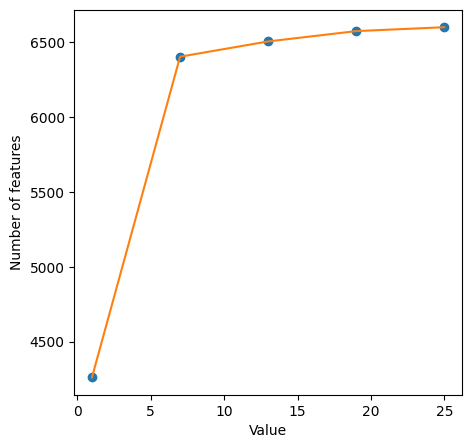

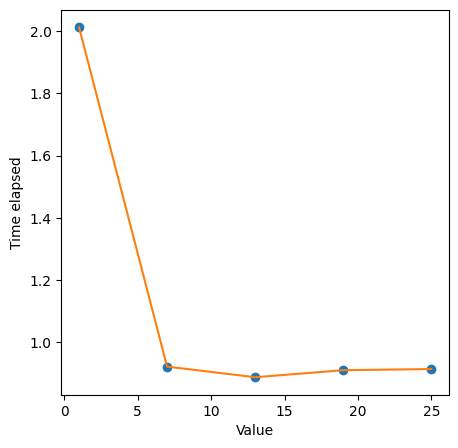

In [5]:
plt.figure(figsize=(5,5))
plt.plot(df['value'], df['n_features'], 'o')
plt.plot(df['value'], df['n_features'])
plt.xlabel('Value')
plt.ylabel('Number of features')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(df['value'], df['timing'], 'o')
plt.plot(df['value'], df['timing'])
plt.xlabel('Value')
plt.ylabel('Time elapsed')
plt.show()